## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization and unit vector normalization in python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables and deleted the "NOX" (nitride oxide concentration) variable because it was highly correlated with two other features.

In [8]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# first, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop("NOX",axis=1)

## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b65586748>,
      dtype=object)

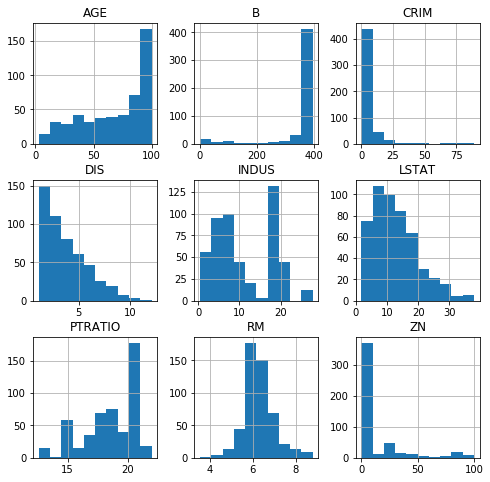

In [12]:
# Your code here
boston_new = boston_features[boston_features.columns.drop(list(boston_features.filter(regex = "TAX")))]
boston_new = boston_new[boston_new.columns.drop(list(boston_new.filter(regex = "RAD")))]
boston_new = boston_new.drop(["CHAS"], axis =1)

boston_new.hist(figsize = [8,8])

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the "ZN" variable?  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b6517c128>,
      dtype=object)

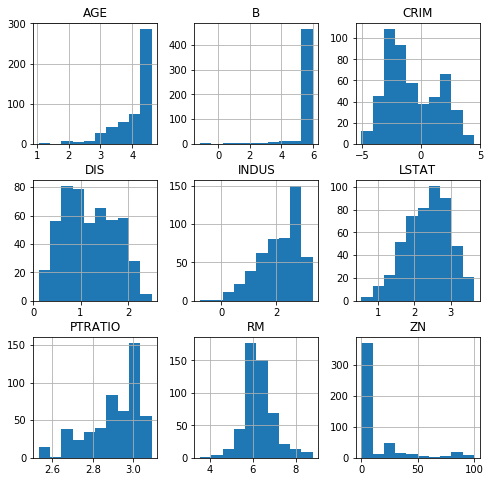

In [13]:
# Your code here
import numpy as np
boston_new["AGE"] = boston_new["AGE"].apply(lambda x: np.log(x))
boston_new["B"] = boston_new["B"].apply(lambda x: np.log(x))
boston_new["CRIM"] = boston_new["CRIM"].apply(lambda x: np.log(x))
boston_new["DIS"] = boston_new["DIS"].apply(lambda x: np.log(x))
boston_new["INDUS"] = boston_new["INDUS"].apply(lambda x: np.log(x))
boston_new["LSTAT"] = boston_new["LSTAT"].apply(lambda x: np.log(x))
boston_new["PTRATIO"] = boston_new["PTRATIO"].apply(lambda x: np.log(x))
boston_new.hist(figsize = [8,8])

"ZN" has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [ ]:
# Your code here

## Try different types of transformations on the continuous variables

Store your final features in a dataframe `features_final`

In [ ]:
# Your code here

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` dataframe.